# Punto 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt

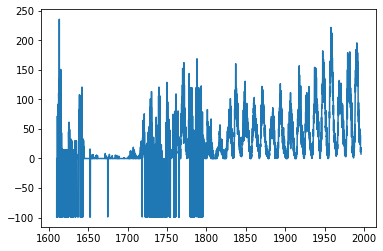

In [19]:
data= np.loadtxt("ManchasSolares.dat")
fecha=data[:,0]+(data[:,1]/12)
freq= data[:,3]
plt.plot(fecha,freq)

### Punto a

In [8]:
filtered= data[np.where(data[:,0]>=1900)]

(4632, 5)


array([1900., 1900., 1900., ..., 1995., 1995., 1995.])

### Punto b 

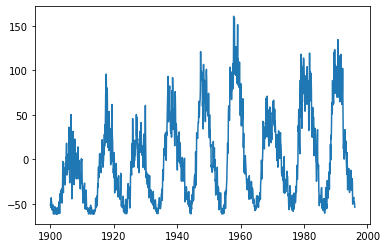

In [31]:
mean=np.mean(filtered[:,3])
fecha=filtered[:,0]+(filtered[:,1]/12)
freq= filtered[:,3]-mean
plt.plot(fecha,freq)

### Punto c

In [46]:
fft=np.fft.fft(freq)
freq1=np.fft.fftfreq(len(freq),1)
ffta=np.abs(fft)

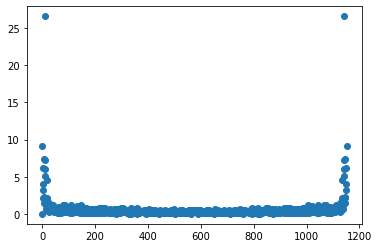

In [47]:
plt.scatter(np.arange(len(freq)),np.abs(fft/len(freq)))

### Punto d 

In [56]:
i=np.argmax(ffta)
fmax=freq1[i]
print("Frecuencia dominante: {}".format(fmax))
period= (1/fmax)/12
print("Periodo:{}".format(period))

Frecuencia dominante: 0.0078125
Periodo:10.666666666666666


### Punto e 

[-28321.84397813+11668.51144407j -28321.84397813-11668.51144407j]


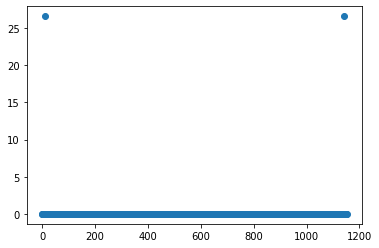

In [48]:
fft[np.where(np.abs(freq1)!=fmax)]=0

plt.scatter(np.arange(len(freq)),np.abs(fft/len(freq)))
print(fft[np.where(fft!=0)])

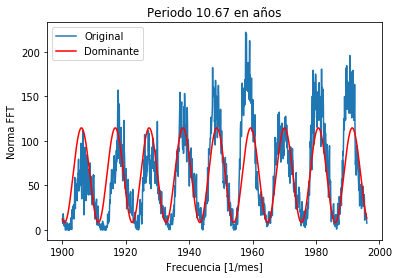

In [55]:
recuperada=np.fft.ifft(fft)
plt.plot(fecha,freq+mean, label="Original")
plt.plot(fecha,np.real(recuperada)+mean, label="Dominante", c="r")
plt.xlabel("Frecuencia [1/mes]")
plt.ylabel("Norma FFT")
plt.title("Periodo {} en años".format(np.round(period,2)))
plt.legend()